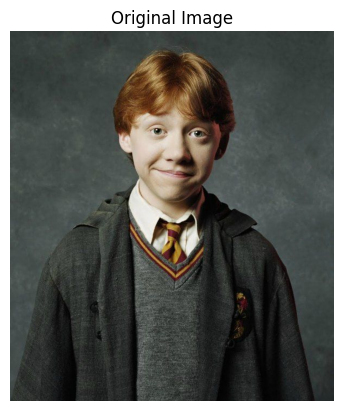

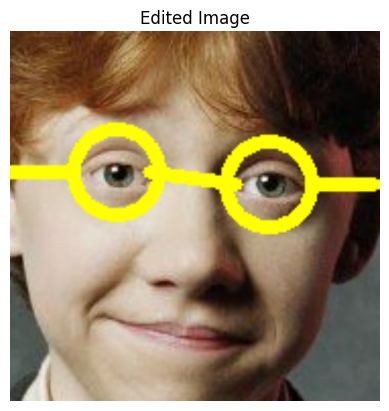

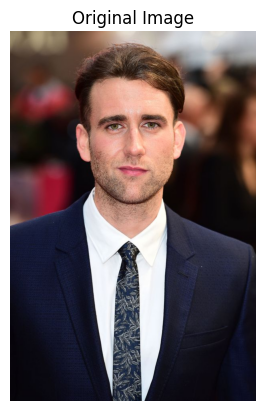

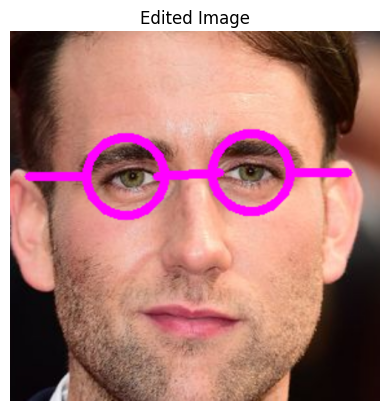

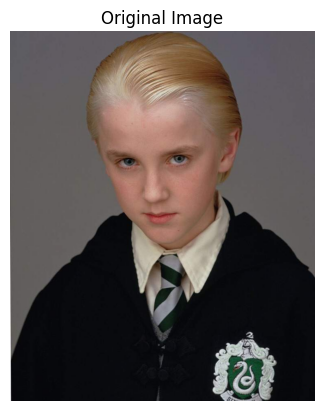

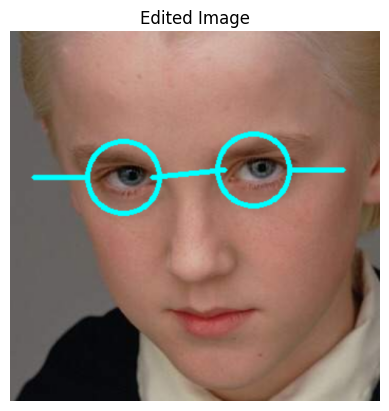

In [2]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

color_dict = {
    'red': (0, 0, 255),
    'blue': (255, 0, 0),
    'cyan': (255, 255, 0), # я змінив в xlsx файлі "cian" на "cyan"
    'magenta': (255, 0, 255),
    'yellow': (0, 255, 255)
}

data_frame = pd.read_excel('lab6.xlsx')
N = ord('Y') % 5 + 1

def draw_glasses(row_data):
    if pd.notna(row_data['file name']):
        path_to_image = f"images/{row_data['file name']}"
        img = cv2.imread(path_to_image)
        if img is not None:
            face_cascade_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
            eye_cascade_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            detected_faces = face_cascade_classifier.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title('Original Image')
            plt.axis('off')
            plt.show()

            glasses_color_text = row_data['glasses color']
            line_width = row_data['line width']
            glasses_color = color_dict.get(glasses_color_text.lower())

            if glasses_color is not None:
                for (position_x, position_y, width, height) in detected_faces:
                    center_x = position_x + width // 2
                    center_y = position_y + height // 2
                    target_zone_gray = gray_image[position_y:position_y + height, position_x:position_x + width]
                    target_zone_color = img[position_y:position_y + height, position_x:position_x + width]
                    detected_eyes = eye_cascade_classifier.detectMultiScale(target_zone_gray)
                    if len(detected_eyes) >= 2:
                        detected_eyes = sorted(detected_eyes, key=lambda x: x[0])
                        left_eye_center = (int(position_x + detected_eyes[0][0] + detected_eyes[0][2] / 2),
                                           int(position_y + detected_eyes[0][1] + detected_eyes[0][3] / 2))
                        right_eye_center = (int(position_x + detected_eyes[1][0] + detected_eyes[1][2] / 2),
                                            int(position_y + detected_eyes[1][1] + detected_eyes[1][3] / 2))
                        eye_radius = int(min(detected_eyes[0][2], detected_eyes[0][3], detected_eyes[1][2],
                                             detected_eyes[1][3]) / 2)
                        cv2.circle(img, left_eye_center, eye_radius, glasses_color, line_width)
                        cv2.circle(img, right_eye_center, eye_radius, glasses_color, line_width)
                        ear_distance = int(2.5 * eye_radius)
                        left_start = (left_eye_center[0] - eye_radius, left_eye_center[1])
                        right_start = (right_eye_center[0] + eye_radius, right_eye_center[1])
                        left_ear = (int(left_eye_center[0] - ear_distance), int(left_eye_center[1]))
                        right_ear = (int(right_eye_center[0] + ear_distance), int(right_eye_center[1]))
                        cv2.line(img, left_start, left_ear, glasses_color, line_width)
                        cv2.line(img, right_start, right_ear, glasses_color, line_width)
                        central_line_start = (left_eye_center[0] + int(0.8 * eye_radius), left_eye_center[1])
                        central_line_end = (right_eye_center[0] - int(0.8 * eye_radius), right_eye_center[1])
                        cv2.line(img, central_line_start, central_line_end, glasses_color, line_width)
                        crop_size = min(width, height) // 2
                        x_crop = max(0, center_x - crop_size)
                        y_crop = max(0, center_y - crop_size)
                        cropped_image = img[y_crop:y_crop + 2 * crop_size, x_crop:x_crop + 2 * crop_size]
                        resized_image = cv2.resize(cropped_image, (500, 500))
                        plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
                        plt.title('Edited Image')
                        plt.axis('off')
                        plt.show()

draw_glasses(data_frame.iloc[N - 1]) # мій варіант
draw_glasses(data_frame.iloc[3]) # тест на інших зображеннях
draw_glasses(data_frame.iloc[2])
